In [2]:
import numpy as np
from scipy.fft import fft,fftfreq,rfft,rfftfreq

In [7]:
def sine_wave(freq,s_rate,duration):
    t = np.linspace(0,duration,s_rate*duration,endpoint = False)
    x = np.sin(freq*2*np.pi*t)
    return t,x

In [33]:
FREQ_A = 10000 #Hz
FREQ_B = 4000 #Hz
S_RATE = 44100
DURATION = 5

_,nice_tone = sine_wave(FREQ_A,S_RATE,DURATION)
_,noise_tone = sine_wave(FREQ_B,S_RATE,DURATION)
noise_tone = noise_tone * 0.3
mixed_tone = noise_tone + nice_tone

In [34]:
normalise_tone = np.int16(mixed_tone/mixed_tone.max()*32767)


In [35]:
from matplotlib import pyplot as plt

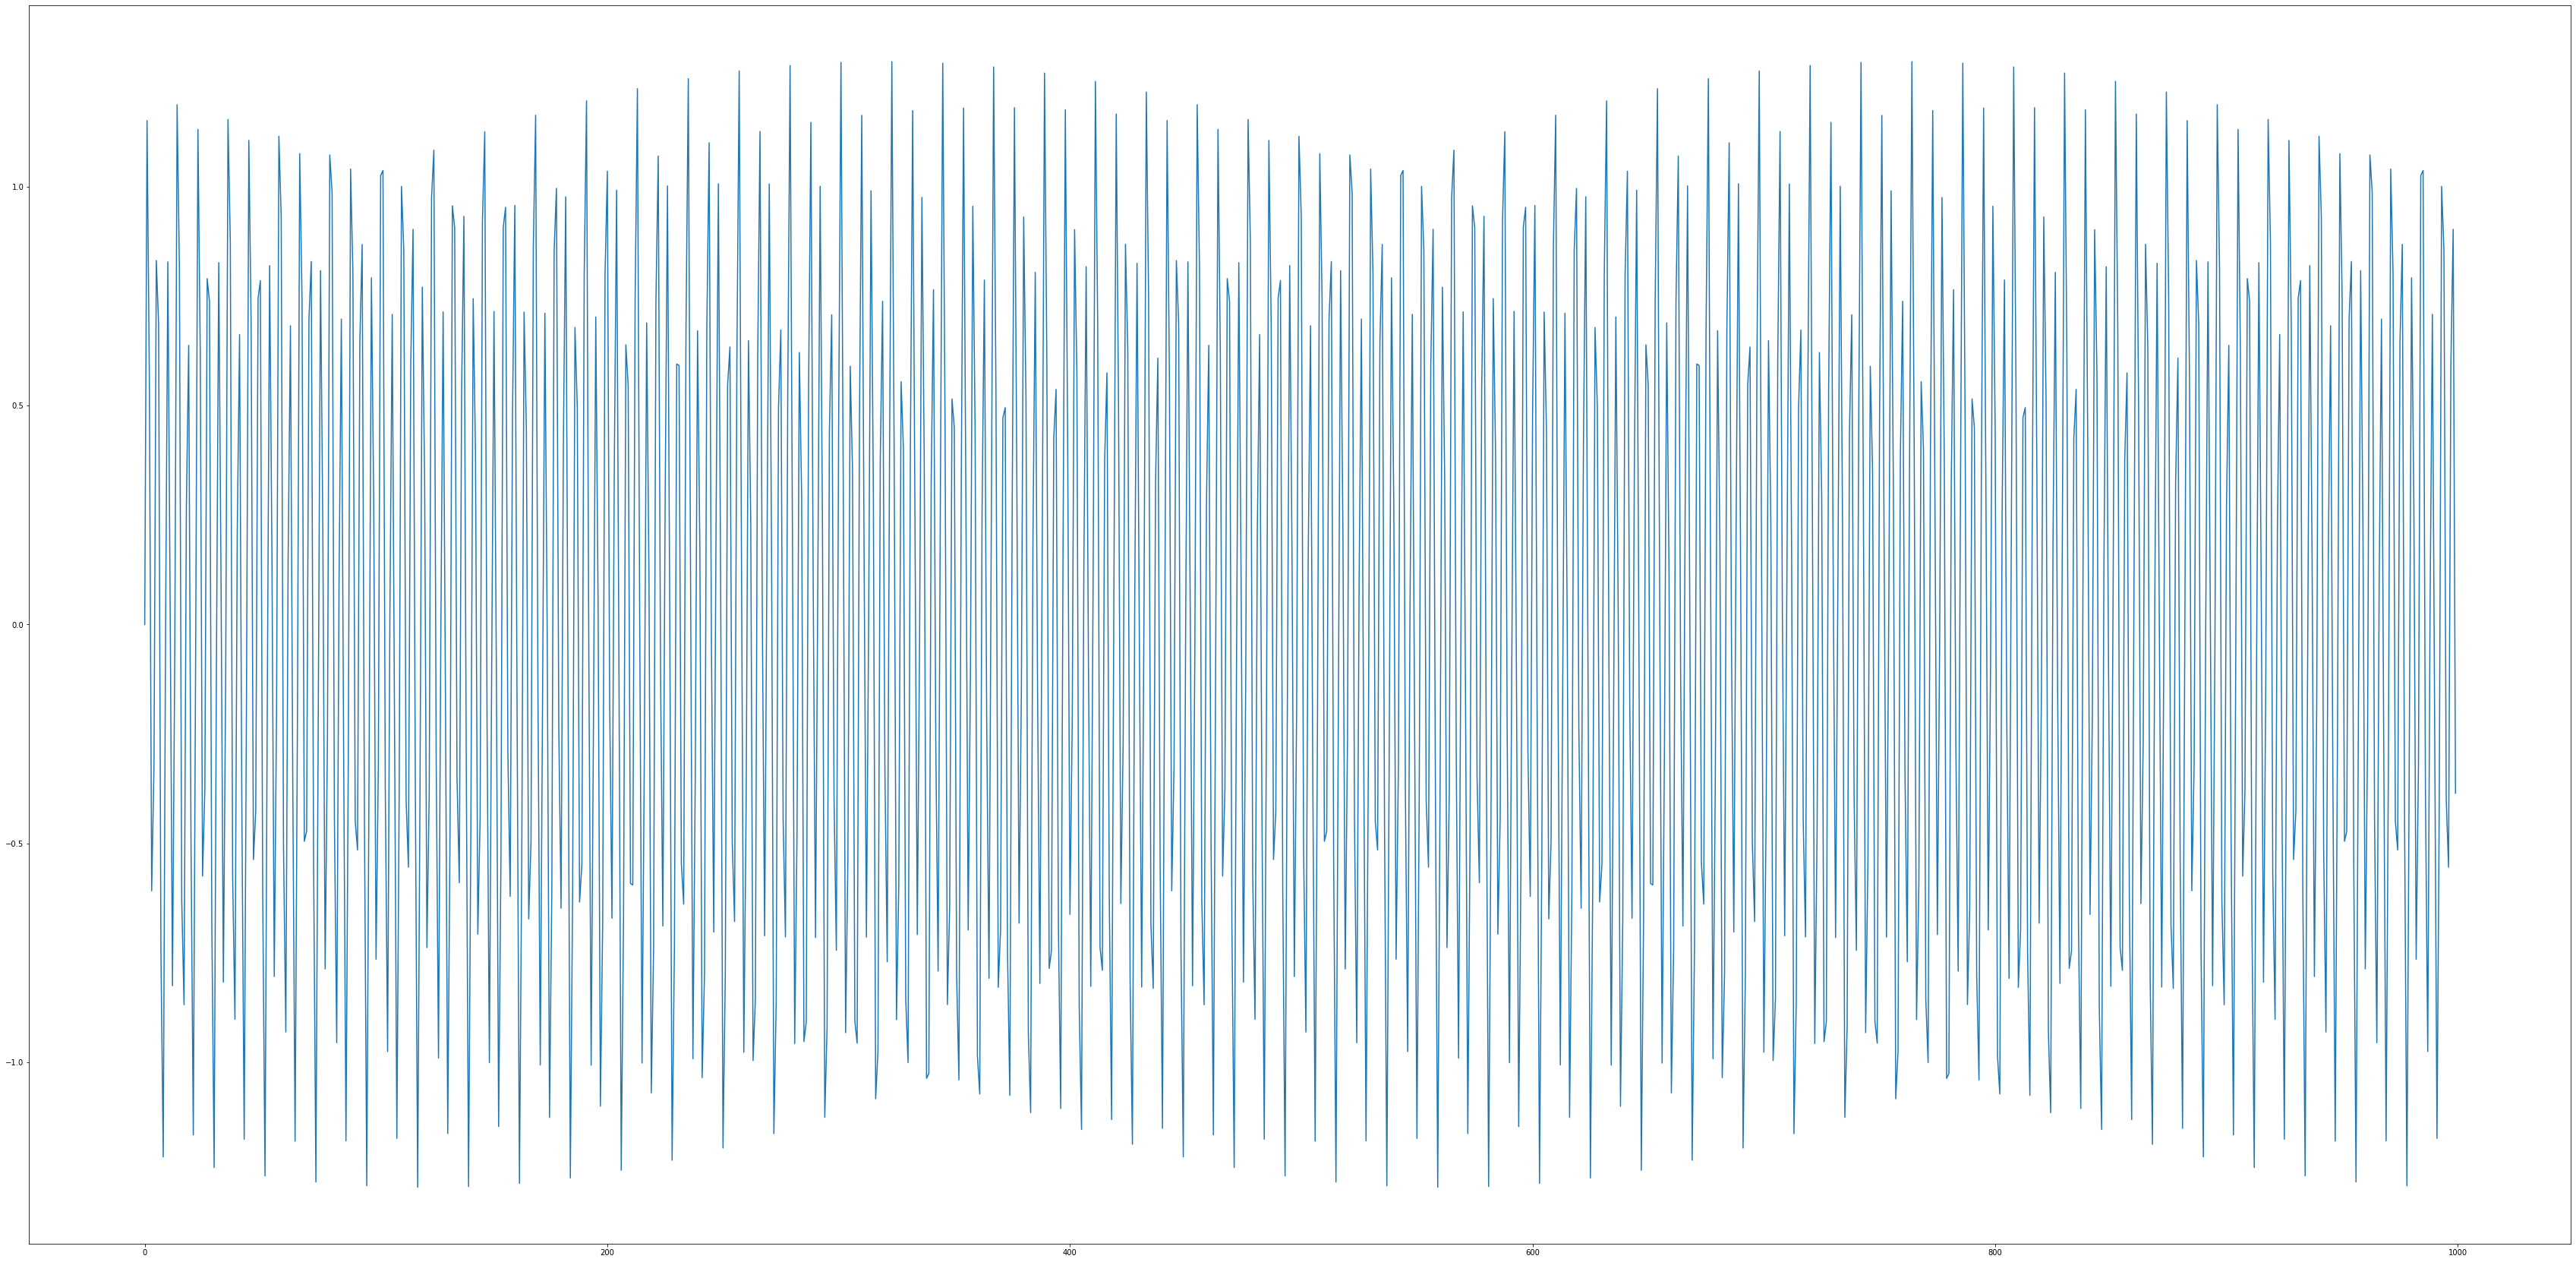

In [36]:
plt.figure(figsize=(60,30))
plt.plot(mixed_tone[:1000])
plt.show()

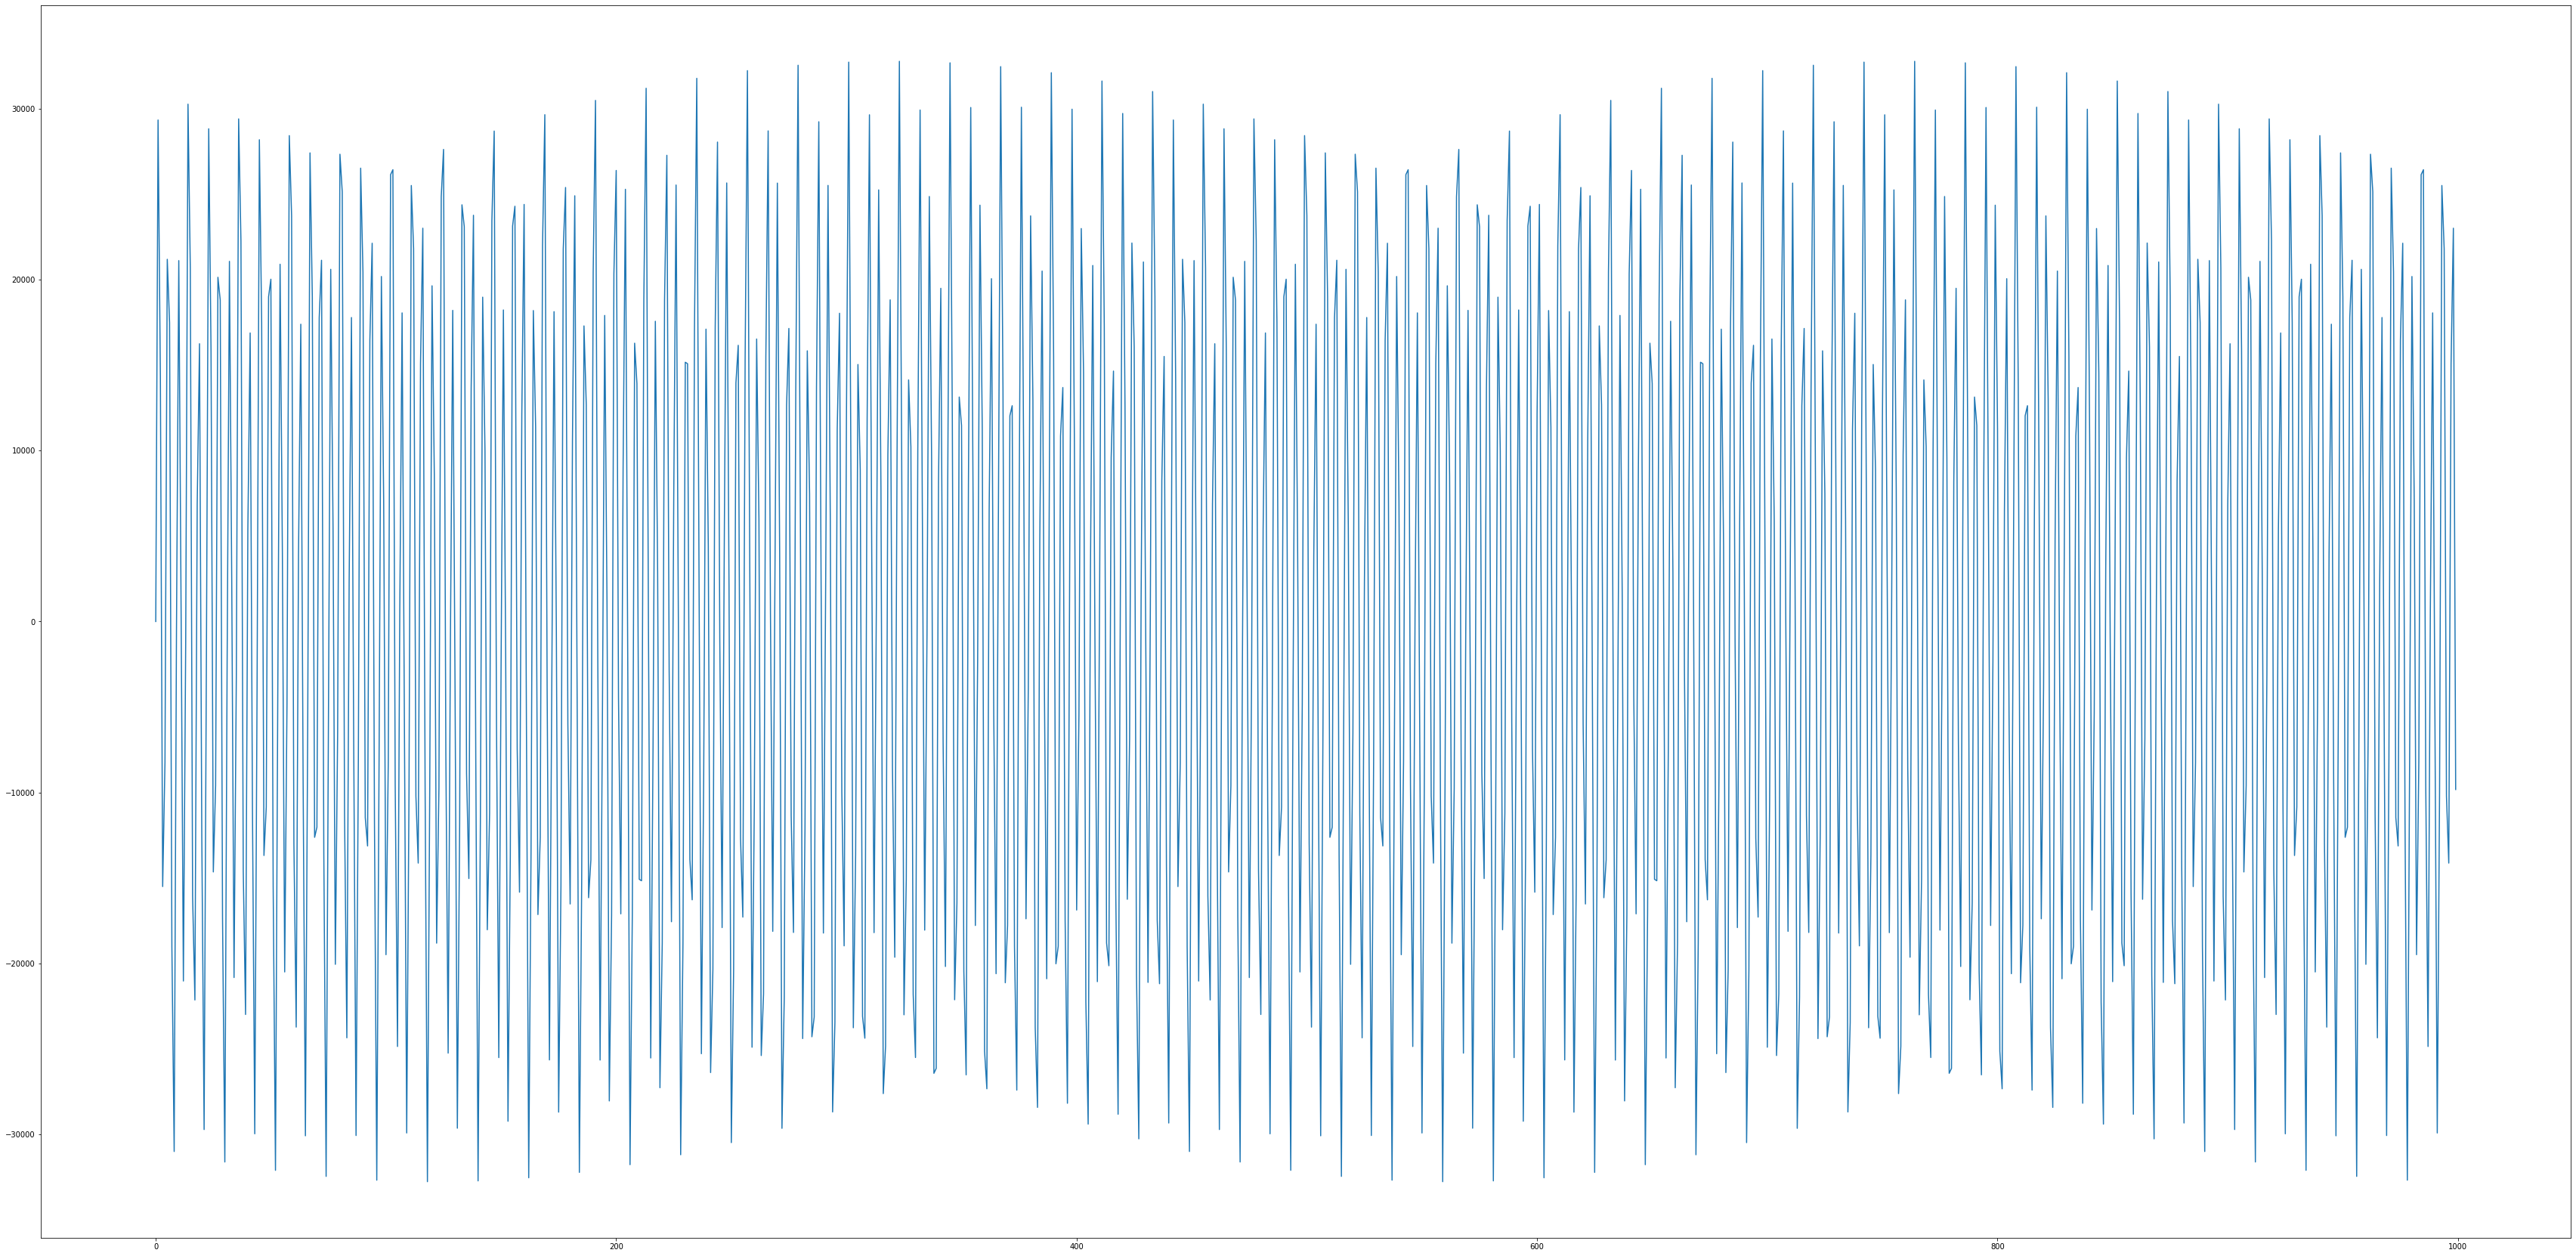

In [37]:
plt.figure(figsize=(60,30))
plt.plot(normalise_tone[:1000])
plt.show()

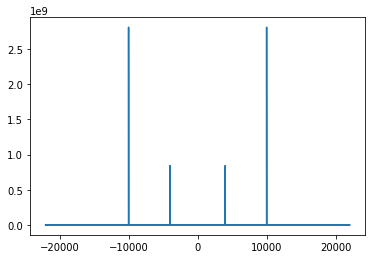

In [38]:
N = S_RATE*DURATION
yf = fft(normalise_tone)
xf = fftfreq(N,1/S_RATE)
plt.plot(xf,np.abs(yf))
plt.show()

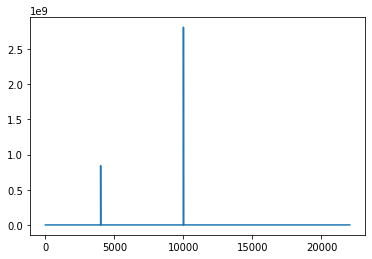

In [39]:
yf = rfft(normalise_tone)
xf = rfftfreq(N,1/S_RATE)
plt.plot(xf,np.abs(yf))
plt.show()